# Seizure data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

import src.data.prepare as prep


# load data
#seizures = pd.read_csv("../../Data/Validators/2016-07-11T1636.dat",
#                   sep="\t", header=None, names=['start', 'end']);
seizures = prep.load_real_seizures('2016-07-11T1636') # TODO create dataframe with all seizres!!

## Transform data

In [2]:
#seizures['start'] = seizures['start'] / 2000
#seizures['end'] = seizures['end'] / 2000
#seizure_start = pd.to_timedelta(seizures['start'], unit='s')
#seizure_end   = pd.to_timedelta(seizures['end'], unit='s')

#seizures = pd.concat([seizure_start, seizure_end], axis=1)
seizures.tail()

start             end          length
s_nr                                                
118  00:30:02.445000 00:30:08.525000 00:00:06.080000
119  00:30:17.590000 00:30:26.060000 00:00:08.470000
120  00:30:35.500000 00:30:37.060000 00:00:01.560000
121  00:30:44.245000 00:30:46.145000 00:00:01.900000
122  00:30:52.435000 00:31:01.480000 00:00:09.045000

In [3]:
seizures['yvalue'] = 0


seizures_start_in_seconds = seizures['start'] // pd.Timedelta(seconds=1)
seizures_end_in_seconds = seizures['end'] // pd.Timedelta(seconds=1)
#ax = plt.plot(seizures_start_in_seconds, seizures['yvalue'])

## Length of seizures

In [4]:
seizures['length'] = seizures['end'] - seizures['start']
seizures['length'].describe()

count                       123
mean     0 days 00:00:06.573532
std      0 days 00:00:01.978092
min      0 days 00:00:01.320000
25%      0 days 00:00:05.554750
50%      0 days 00:00:06.805000
75%      0 days 00:00:08.040000
max      0 days 00:00:10.595000
Name: length, dtype: object

In [5]:
length_in_seconds = (seizures['length'] / pd.Timedelta(seconds=1))

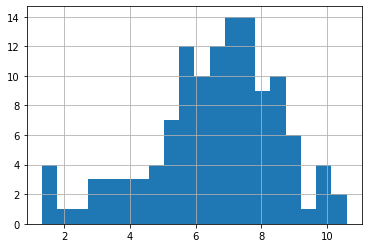

In [6]:
length_in_seconds.hist(bins=20)# TODO change bin length to 1 second

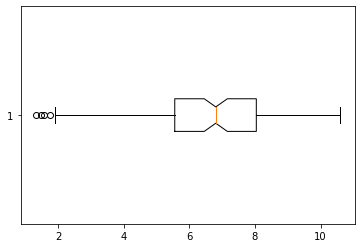

In [7]:
plt.boxplot(length_in_seconds, notch=True, vert=False);

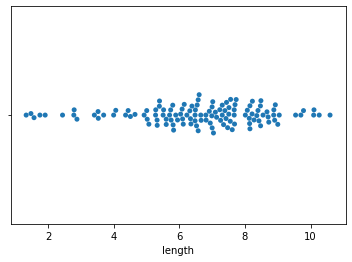

In [8]:
sns.swarmplot(x=length_in_seconds)

In [9]:
time_for_all_seizures = seizures['start'].iloc[-1]-seizures['start'].iloc[0]
seizures_per_min = seizures['start'].size / (time_for_all_seizures.seconds/60)
print('Seizures/min:', seizures_per_min)# TODO wrong calculated!!!!! use sum of length_in_seconds

Seizures/min: 4.070601213458357


## Time between seizures

In [10]:
seizures['time_to_seizure_before'] = seizures['start'] - seizures['end'].shift()
seizures['time_to_seizure_before'].describe()

count                       122
mean     0 days 00:00:08.314221
std      0 days 00:00:05.108288
min      0 days 00:00:00.905000
25%      0 days 00:00:05.040000
50%      0 days 00:00:07.633750
75%      0 days 00:00:09.906500
max      0 days 00:00:39.190000
Name: time_to_seizure_before, dtype: object

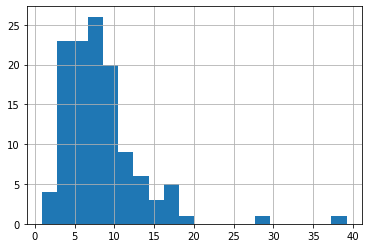

In [11]:
time_to_seizure_before_in_seconds = (seizures['time_to_seizure_before'] / pd.Timedelta(seconds=1))
time_to_seizure_before_in_seconds.hist(bins=20);

## Percentages

In [12]:
seizure_percentage = seizures['length'].sum()/(seizures['length'].sum() + seizures['time_to_seizure_before'].sum())
print('Seizure:', seizure_percentage*100, "% of the total time.")

Seizure: 44.3553454849868 % of the total time.


Comment: The percentage is not equal to the inverse of the seizures/min above, because this calculation here depends on the length of the seizures (per minute), while the other one only counts the seizures per minute.

TODO add different rats